In [1]:
import torch as torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from DataRead import OurData
import traceback
import struct
import matplotlib.colors as mcolors

from Visualization import DataVisual
from DataRead import OurData, compress
from kan import KAN

torch.set_default_dtype(torch.float32)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 28*28 # from 28*28

In [ ]:
#total train datapoints=60000, test datapoints=10000. approx time:1min/100 points model1, 30s/1000 points model2, 1min/2500 points model3
data = OurData() 
#If you want you can choose a continuation of the data from the previous run
ourdata = data.filldata(25, 784, 75)
ourdata2 = data.filldata(200, 112, 800)
ourdata3 = data.filldata(500, 28, 4500)
print(ourdata['train_label'].size(), ourdata2['train_label'].size(), ourdata3['train_label'].size())
print(ourdata['train_input'].size(), ourdata2['train_input'].size(), ourdata3['train_input'].size())

torch.Size([25, 10]) torch.Size([200, 10]) torch.Size([500, 10])
torch.Size([25, 784]) torch.Size([200, 112]) torch.Size([500, 28])


In [ ]:
model = KAN(width=[784, 80, 10], grid=5, k=3, seed=0, device=device, ckpt_path='./loadedmodels/loadedmodel')
model2 = KAN(width=[112, 40, 10], grid=5, k=3, seed=0, device=device, ckpt_path='./loadedmodels/loadedmodel2')
model3 = KAN(width=[28, 15, 10], grid=5, k=3, seed=0, device=device, ckpt_path='./loadedmodels/loadedmodel3')

In [ ]:
#load older models. Comment out if you want to train new models
model = model.loadckpt('./checkpoints/model_checkpoint')
model2 = model2.loadckpt('./checkpoints/model2_checkpoint')
model3 = model3.loadckpt('./checkpoints/model3_checkpoint')

#steps = intervals to divide the dataset and update model, epochs = how many times the entire dataset is passed through the model
modelresults = []
modelresults.append(model.fit(ourdata, opt="LBFGS", steps=20, lamb=0.001))
modelresults.append(model2.fit(ourdata2, opt="LBFGS", steps=40, lamb=0.001))
modelresults.append(model3.fit(ourdata3, opt="LBFGS", steps=80, lamb=0.001))

In [ ]:
plt.plot(range(1, len(modelresults[0]['train_loss']) + 1), modelresults[0]['train_loss'])
plt.title('Model1(Loaded) Train Loss')
plt.show()
plt.plot(range(1, len(modelresults[0]['test_loss']) + 1), modelresults[0]['test_loss'])
plt.title('Model1(Loaded) Test Loss')
plt.show()

In [ ]:
plt.plot(range(1, len(modelresults[1]['train_loss']) + 1), modelresults[1]['train_loss'])
plt.title('Model2 Train Loss')
plt.show()
plt.plot(range(1, len(modelresults[1]['test_loss']) + 1), modelresults[1]['test_loss'])
plt.title('Model2 Test Loss')
plt.show()

In [ ]:
plt.plot(range(1, len(modelresults[2]['train_loss']) + 1), modelresults[2]['train_loss'])
plt.title('Model3 Train Loss')
plt.show()
plt.plot(range(1, len(modelresults[2]['test_loss']) + 1), modelresults[2]['test_loss'])
plt.title('Model3 Test Loss')
plt.show()

In [ ]:
eval1 = model.evaluate(ourdata)
eval2 = model2.evaluate(ourdata2)
eval3 = model3.evaluate(ourdata3)
evaluation_results = [eval1, eval2, eval3]
test_losses = [[result['test_loss'] for result in evaluation_results]]

plt.scatter([i for i in range(1, 4)], test_losses, label='Test Loss')
plt.xlabel('Model Number')
plt.ylabel('Loss')
plt.title('Scatter Plot of Models')
plt.show()

In [23]:
testingdata = data.getitems(9950, 10000) 
predictions = model.forward(testingdata[0])
predictions2 = model2.forward(compress(testingdata[0], 112))
predictions3 = model3.forward(compress(testingdata[0], 28))
allpredictions = [predictions, predictions2, predictions3]

In [24]:
pred1 = DataVisual(testingdata[1], predictions)
pred2 = DataVisual(testingdata[1], predictions2)
pred3 = DataVisual(testingdata[1], predictions3)

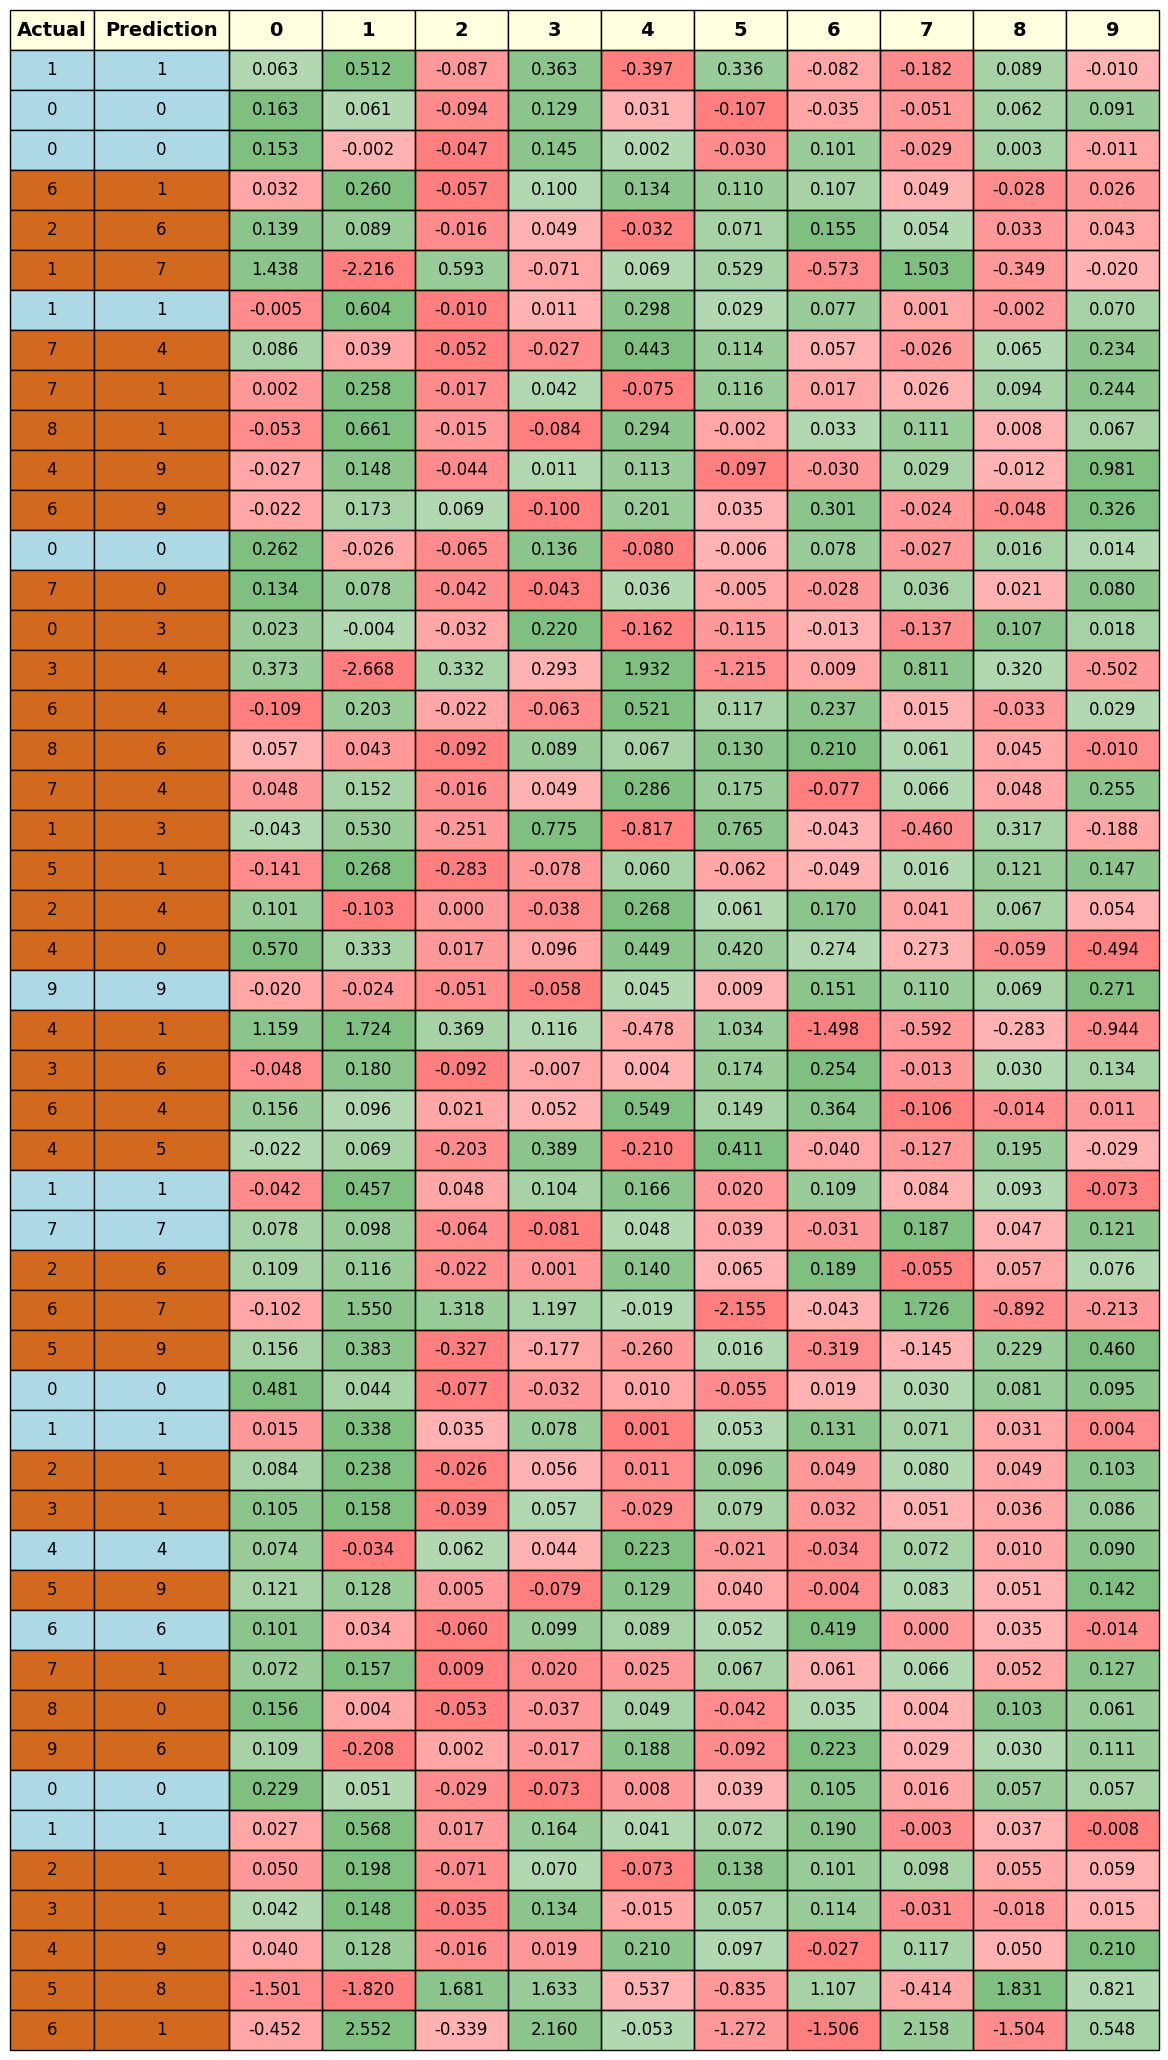

In [26]:
pred1.displayFullTable()


In [17]:
model.saveckpt(path='./checkpoints/model_checkpoint') #saves the model into the files
model2.saveckpt(path='./checkpoints/model2_checkpoint')
model3.saveckpt(path='./checkpoints/model3_checkpoint')

In [ ]:
#a different method of calculating error, convert into a classification problem
#figure out how to save and load models
#experiment with parameters for better accuracy - grid, k, width/length, lamb, steps, lossfn, 
#model.saveckpt(path='./model_checkpoint') #saves the model into the files